*Copyright 2024 Jaeyoung Chun*

You may not make copies of this and use or distribute it for any purpose.

# Detecting Objects in Photo

In [1]:
import os

## Drone Photo

In [2]:
path_data = "./data"

In [3]:
# path to the image file
path_source = os.path.join(path_data, "drone-photo-original.png")

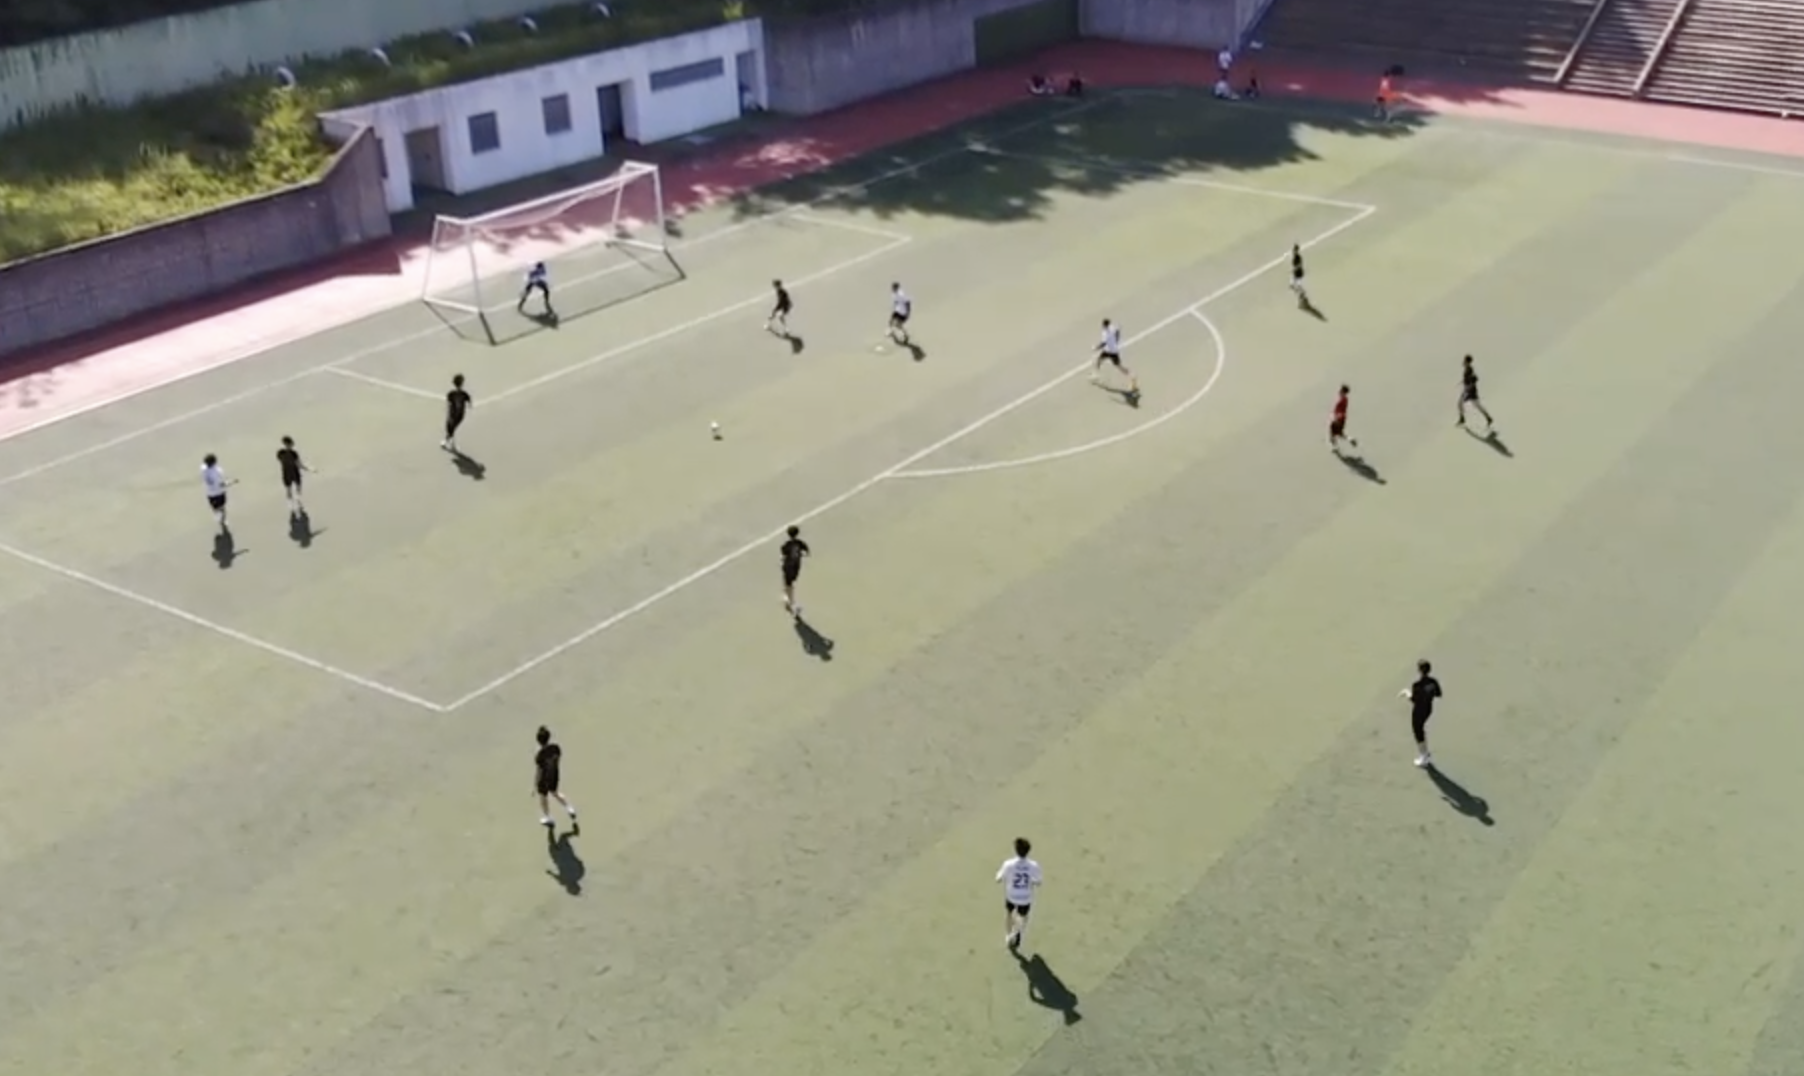

In [4]:
from IPython.display import Image
Image(filename=path_source) 

## Load Pre-trained Model


| Model                                                                                | size<br><sup>(pixels) | mAP<sup>val<br>50-95 | Speed<br><sup>CPU ONNX<br>(ms) | Speed<br><sup>A100 TensorRT<br>(ms) | params<br><sup>(M) | FLOPs<br><sup>(B) |
| ------------------------------------------------------------------------------------ | --------------------- | -------------------- | ------------------------------ | ----------------------------------- | ------------------ | ----------------- |
| YOLOv8n | 640                   | 37.3                 | 80.4                           | 0.99                                | 3.2                | 8.7               |
| YOLOv8s | 640                   | 44.9                 | 128.4                          | 1.20                                | 11.2               | 28.6              |
| YOLOv8m | 640                   | 50.2                 | 234.7                          | 1.83                                | 25.9               | 78.9              |
| YOLOv8l | 640                   | 52.9                 | 375.2                          | 2.39                                | 43.7               | 165.2             |
| YOLOv8x | 640                   | 53.9                 | 479.1                          | 3.53                                | 68.2               | 257.8             |

In [5]:
from ultralytics import YOLO

In [6]:
model = YOLO("yolov8x.pt")

## Inference

In [7]:
# run the inference on the image
results = model(path_source)


image 1/1 /Users/chunj/projects/facamp-2024-summer-pvt/live/session-08/data/drone-photo-original.png: 384x640 17 persons, 456.3ms
Speed: 1.6ms preprocess, 456.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


In [8]:
bgr_img = results[0].plot()

## Display

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

### BGR

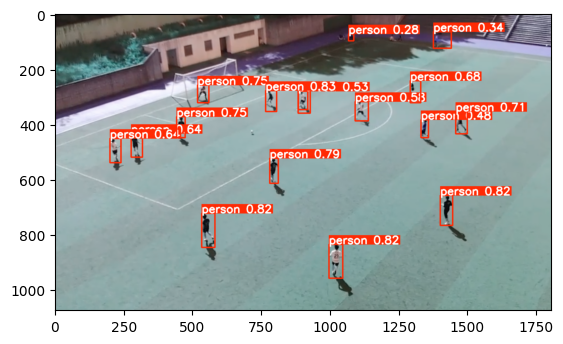

In [10]:
fig, ax = plt.subplots()

ax.imshow(bgr_img)

plt.show()

### RGB

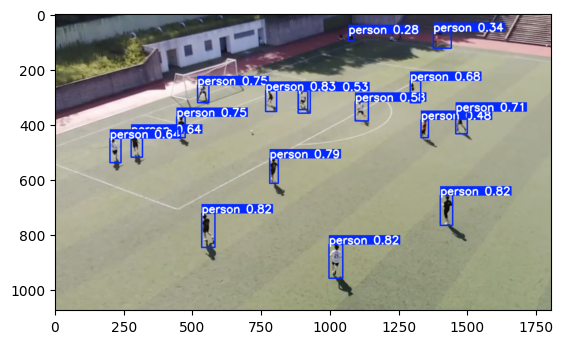

In [11]:
fig, ax = plt.subplots()

rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
ax.imshow(rgb_img)

plt.show()

## Write Result to File

In [12]:
cv2.imwrite(
    os.path.join(path_data, "drone-photo-object-detected.png"),
    bgr_img
)

True